In [1]:
import numpy as np

In [2]:
input = """\
0,9 -> 5,9
8,0 -> 0,8
9,4 -> 3,4
2,2 -> 2,1
7,0 -> 7,4
6,4 -> 2,0
0,9 -> 2,9
3,4 -> 1,4
0,0 -> 8,8
5,5 -> 8,2
"""

In [3]:
input = open('day5.txt').read()

In [4]:
coords = np.genfromtxt(input.replace(' -> ', ',').splitlines(), delimiter=',', dtype=int)
coords = coords.reshape(-1, 2, 2)

In [5]:
%%time
size = coords.max() + 1
grid = np.zeros((size, size), dtype=int)

for start, end in coords:
    if start[0] == end[0]:
        st = min(start[1], end[1])
        en = max(start[1], end[1]) + 1
        sl = np.s_[start[0], st:en]
    elif start[1] == end[1]:
        st = min(start[0], end[0])
        en = max(start[0], end[0]) + 1
        sl = np.s_[st:en, start[1]]
    else:
        continue
    grid[sl] += 1

CPU times: user 29.7 ms, sys: 16.5 ms, total: 46.3 ms
Wall time: 46.8 ms


In [6]:
#grid.T

In [7]:
np.sum(grid > 1)

6666

In [8]:
%%time
size = coords.max() + 1
grid = np.zeros((size, size), dtype=int)

for start, end in coords:
    minx = min(start[0], end[0])
    maxx = max(start[0], end[0])
    miny = min(start[1], end[1])
    maxy = max(start[1], end[1])
    
    if start[0] == end[0]:
        sl = np.s_[start[0], miny:maxy + 1]
        grid[sl] += 1
    elif start[1] == end[1]:
        sl = np.s_[minx:maxx + 1, start[1]]
        grid[sl] += 1
    elif np.unique(np.abs(end - start)).size == 1:
        indx = np.arange(minx, maxx+1)
        indy = np.arange(miny, maxy+1)

        if start[0] > end[0]:
            indx = indx[::-1]
        if start[1] > end[1]:
            indy = indy[::-1]
        grid[indx, indy] += 1

CPU times: user 26.1 ms, sys: 3.4 ms, total: 29.5 ms
Wall time: 27.6 ms


In [9]:
#grid.T

In [10]:
np.sum(grid > 1)

19081

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt

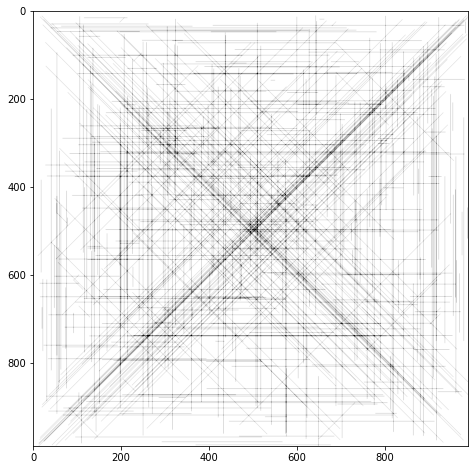

In [24]:
plt.figure(figsize=(8, 8))
plt.imshow(grid, cmap='Greys', vmax=2);